<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/M%C3%A8todo_explicito_Ecuacion_de_Onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from tabulate import tabulate

In [2]:
# Parámetros del problema
h = 0.1
k = 0.05
alfa = 2
r = (alfa**2 * k**2) / h**2

In [3]:
# Condición inicial
def f(x):
    return np.sin(np.pi * x)

In [4]:
# Solución exacta
def u_exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

In [5]:

# Crear matriz A para el método de diferencias finitas
def matriz_A(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2 * (1 - r)
        if i > 0:
            A[i, i-1] = r
        if i < n-1:
            A[i, i+1] = r
    return sp.Matrix(A)

In [6]:

# Método de diferencias finitas para la ecuación de onda
def onda(A, u0, u1, j, T=1):
    u0 = sp.Matrix(u0)
    u1 = sp.Matrix(u1)

    S = [u0, u1]  # Guardamos soluciones

    for n in range(2, j):
        sol = A * S[n-1] - S[n-2]
        S.append(sol)

    return sp.Matrix([s.T for s in S])

In [7]:
n = 9 #Numero de nodos

In [8]:
# Condiciones iniciales
u0 = [f(0.1 * (i + 1)) for i in range(n)]
u1 = u0  # ∂u/∂t(x, 0) = 0

# Crear matriz A y resolver
A = matriz_A(n)
print("Matriz A creada:")
print(A)

Matriz A creada:
Matrix([[0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0]])


In [9]:

# Resolver hasta t = 0.50 (j = 11 ya que k = 0.05, 0.50/0.05 = 10 pasos)
j = 11  # t = 0, 0.05, 0.10, ..., 0.50
U = onda(A, u0, u1, j, T=0.5)
U_np = np.array(U.tolist(), dtype=float)

In [12]:
#Graficamos
#Parametros
x = np.linspace(0, 1, 9)  # Número de nodos internos en X
y = np.linspace(0, 0.5, j)  # Tiempo desde 0 hasta 0.5
X, Y = np.meshgrid(x, y)

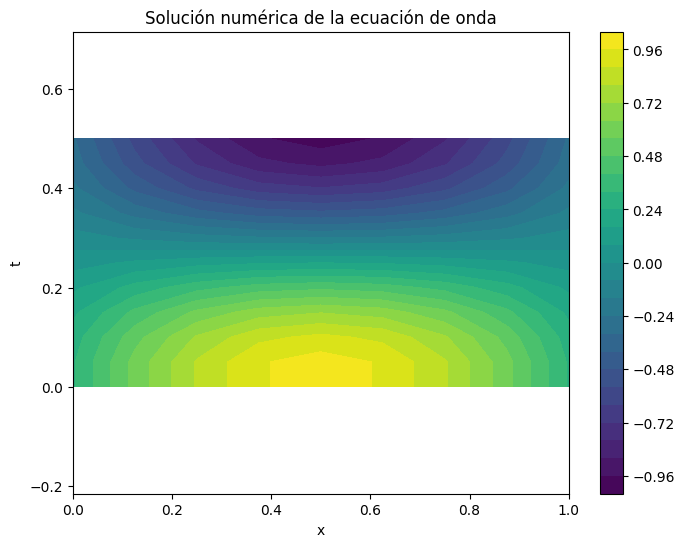

In [13]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de la ecuación de onda')
plt.xlabel('x')
plt.ylabel('t')
plt.axis('equal')
plt.show()

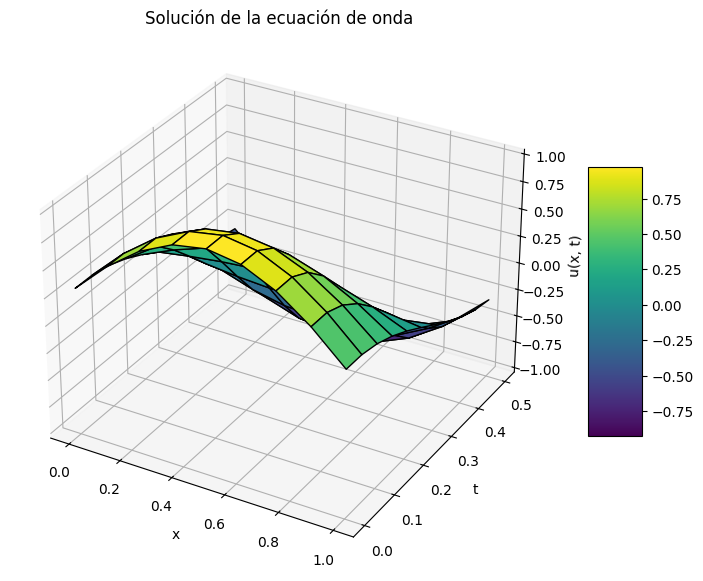

In [14]:
# Gráfica 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación de onda')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [15]:
print("Comparación con Tabla 12.6 (t=1.00)")

# Para comparar con la tabla, necesitamos calcular hasta t=1.00
j_tabla = 21  # t=1.00 (1.00/0.05 = 20 pasos + condición inicial)
U_tabla = onda(A, u0, u1, j=j_tabla, T=1.0)
U_tabla_np = np.array(U_tabla.tolist(), dtype=float)

Comparación con Tabla 12.6 (t=1.00)


In [16]:
# Valores de la tabla 12.6
tabla_12_6 = {
    'x_i': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'w_i_20': [0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944,
               0.9510565163, 1.0000000000, 0.9510565163, 0.8090169944,
               0.5877852523, 0.3090169944, 0.0000000000]
}

In [17]:
# Nuestra solución en t=1.00 (índice 20)
nuestra_sol = np.concatenate(([0], U_tabla_np[20, :], [0]))

In [18]:
# Calcular errores
errores_tabla = np.abs(nuestra_sol - tabla_12_6['w_i_20'])
error_max_tabla = np.max(errores_tabla)
error_promedio_tabla = np.mean(errores_tabla)

In [19]:

# Crear tabla comparativa
tabla_comparativa = []
for i, (x, w_tabla, w_nuestra, error) in enumerate(zip(
    tabla_12_6['x_i'], tabla_12_6['w_i_20'], nuestra_sol, errores_tabla)):

    tabla_comparativa.append([
        x,
        f"{w_tabla:.10f}",
        f"{w_nuestra:.10f}",
        f"{error:.2e}"
    ])

print("\nComparación con Tabla 12.6 (t=1.00):")
print(tabulate(tabla_comparativa,
               headers=['x_i', 'Tabla 12.6', 'Nuestra Sol', 'Error'],
               tablefmt='grid', floatfmt=".10f"))

print(f"\nError máximo con Tabla 12.6: {error_max_tabla:.2e}")
print(f"Error promedio con Tabla 12.6: {error_promedio_tabla:.2e}")


Comparación con Tabla 12.6 (t=1.00):
+--------------+--------------+---------------+--------------+
|          x_i |   Tabla 12.6 |   Nuestra Sol |        Error |
+==============+==============+===============+==============+
| 0.0000000000 | 0.0000000000 |  0.0000000000 | 0.0000000000 |
+--------------+--------------+---------------+--------------+
| 0.1000000000 | 0.3090169944 |  0.3090169944 | 0.0000000000 |
+--------------+--------------+---------------+--------------+
| 0.2000000000 | 0.5877852523 |  0.5877852523 | 0.0000000000 |
+--------------+--------------+---------------+--------------+
| 0.3000000000 | 0.8090169944 |  0.8090169944 | 0.0000000000 |
+--------------+--------------+---------------+--------------+
| 0.4000000000 | 0.9510565163 |  0.9510565163 | 0.0000000000 |
+--------------+--------------+---------------+--------------+
| 0.5000000000 | 1.0000000000 |  1.0000000000 | 0.0000000000 |
+--------------+--------------+---------------+--------------+
| 0.6000000000 | 

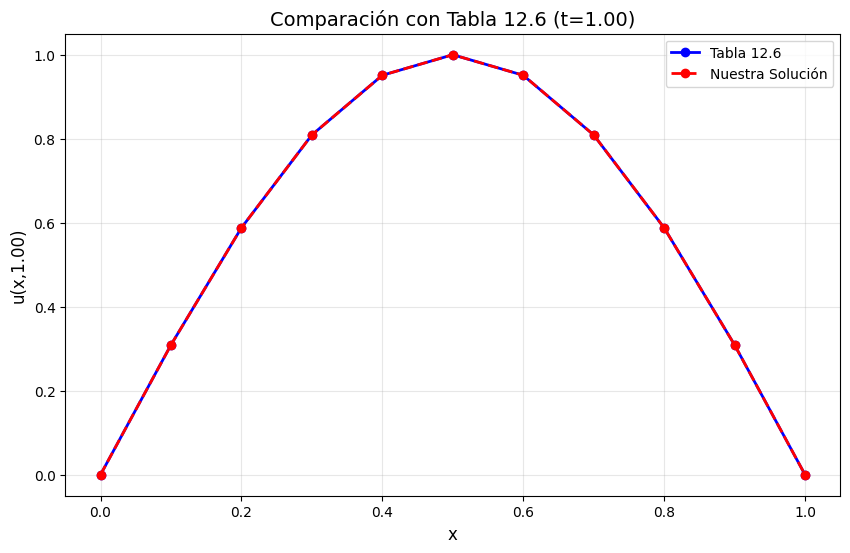

In [20]:
# Gráfica comparativa con tabla
plt.figure(figsize=(10, 6))
plt.plot(tabla_12_6['x_i'], tabla_12_6['w_i_20'], 'bo-',
         label='Tabla 12.6', linewidth=2, markersize=6)
plt.plot(tabla_12_6['x_i'], nuestra_sol, 'ro--',
         label='Nuestra Solución', linewidth=2, markersize=6)
plt.title('Comparación con Tabla 12.6 (t=1.00)', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,1.00)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
# Calcular solución exacta en t=1.00
sol_exacta_t1 = [u_exacta(x, 1.00) for x in tabla_12_6['x_i']]
print(sol_exacta_t1)
# Calcular errores con solución exacta
errores_exacta = np.abs(nuestra_sol - sol_exacta_t1)
error_max_exacta = np.max(errores_exacta)
error_promedio_exacta = np.mean(errores_exacta)

[np.float64(0.0), np.float64(0.3090169943749474), np.float64(0.5877852522924731), np.float64(0.8090169943749475), np.float64(0.9510565162951535), np.float64(1.0), np.float64(0.9510565162951536), np.float64(0.8090169943749475), np.float64(0.5877852522924732), np.float64(0.3090169943749475), np.float64(1.2246467991473532e-16)]


In [22]:
#Comparaciòn con la solucion exacta
tabla_exacta = []
for i, (x, w_exacta, w_nuestra, error) in enumerate(zip(
    tabla_12_6['x_i'], sol_exacta_t1, nuestra_sol, errores_exacta)):

    tabla_exacta.append([
        x,
        f"{w_exacta:.10f}",
        f"{w_nuestra:.10f}",
        f"{error:.2e}"
    ])

print("\nComparación con Solución Exacta (t=1.00):")
print(tabulate(tabla_exacta,
               headers=['x_i', 'Exacta', 'Numérica', 'Error'],
               tablefmt='grid'))


Comparación con Solución Exacta (t=1.00):
+-------+----------+------------+----------+
|   x_i |   Exacta |   Numérica |    Error |
+=======+==========+============+==========+
|   0   | 0        |   0        | 0        |
+-------+----------+------------+----------+
|   0.1 | 0.309017 |   0.309017 | 5.55e-17 |
+-------+----------+------------+----------+
|   0.2 | 0.587785 |   0.587785 | 4.44e-16 |
+-------+----------+------------+----------+
|   0.3 | 0.809017 |   0.809017 | 2.22e-16 |
+-------+----------+------------+----------+
|   0.4 | 0.951057 |   0.951057 | 1.11e-16 |
+-------+----------+------------+----------+
|   0.5 | 1        |   1        | 0        |
+-------+----------+------------+----------+
|   0.6 | 0.951057 |   0.951057 | 4.44e-16 |
+-------+----------+------------+----------+
|   0.7 | 0.809017 |   0.809017 | 2.22e-16 |
+-------+----------+------------+----------+
|   0.8 | 0.587785 |   0.587785 | 3.33e-16 |
+-------+----------+------------+----------+
|   0.9 | 0.

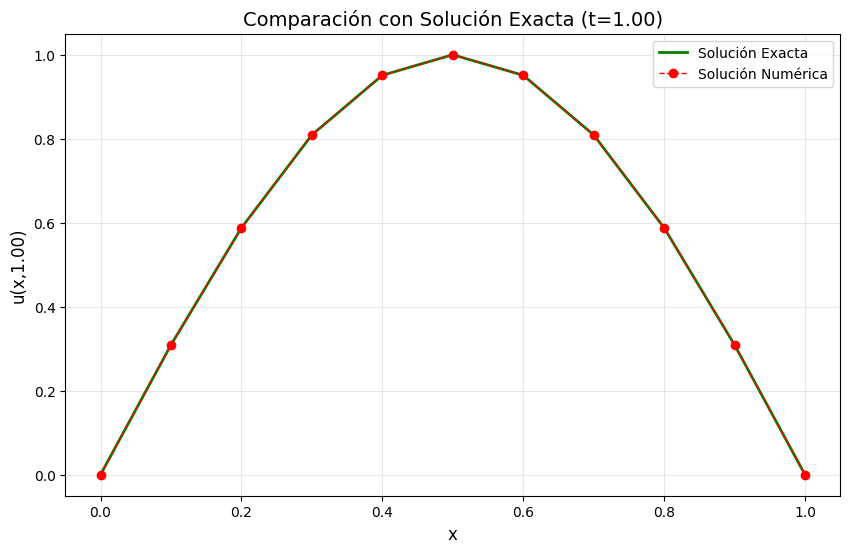

In [23]:
# Gráfica comparativa con solución exacta
plt.figure(figsize=(10, 6))
plt.plot(tabla_12_6['x_i'], sol_exacta_t1, 'g-',
         label='Solución Exacta', linewidth=2)
plt.plot(tabla_12_6['x_i'], nuestra_sol, 'ro--',
         label='Solución Numérica', markersize=6, linewidth=1)
plt.title('Comparación con Solución Exacta (t=1.00)', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,1.00)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

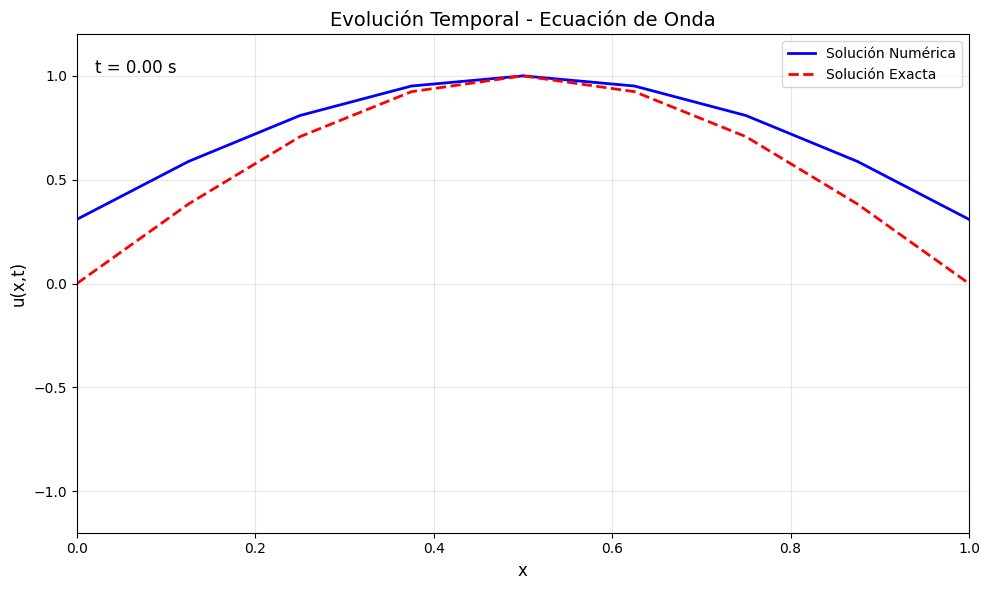

In [24]:

# Calcular solución para la animación (más pasos de tiempo)
j_anim = 41  # t = 0 a 2.00 segundos
U_anim = onda(A, u0, u1, j=j_anim, T=2.0)
U_anim_np = np.array(U_anim.tolist(), dtype=float)

# Crear figura para animación
fig_anim, ax_anim = plt.subplots(figsize=(10, 6))

# Usar los mismos puntos x que en tus gráficas originales
x_anim = np.linspace(0, 1, 9)

line_num, = ax_anim.plot(x_anim, U_anim_np[0, :], 'b-',
                        linewidth=2, label='Solución Numérica')
line_exact, = ax_anim.plot(x_anim, [u_exacta(x, 0) for x in x_anim],
                          'r--', linewidth=2, label='Solución Exacta')

ax_anim.set_xlim(0, 1)
ax_anim.set_ylim(-1.2, 1.2)
ax_anim.set_xlabel('x', fontsize=12)
ax_anim.set_ylabel('u(x,t)', fontsize=12)
ax_anim.set_title('Evolución Temporal - Ecuación de Onda', fontsize=14)
ax_anim.legend()
ax_anim.grid(True, alpha=0.3)

time_text = ax_anim.text(0.02, 0.95, '', transform=ax_anim.transAxes,
                        fontsize=12, verticalalignment='top')

def animate(frame):
    t_val = frame * k
    # Solución numérica
    u_num = U_anim_np[frame, :]
    line_num.set_ydata(u_num)

    # Solución exacta
    u_exact = [u_exacta(x, t_val) for x in x_anim]
    line_exact.set_ydata(u_exact)

    time_text.set_text(f't = {t_val:.2f} s')

    return line_num, line_exact, time_text

# Crear animación
anim = FuncAnimation(fig_anim, animate, frames=j_anim,
                    interval=100, blit=True, repeat=True)

plt.tight_layout()
plt.show()